In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import math
import torch
import matplotlib.pyplot as plt
import scanpy as sc
import squidpy as sq
import anndata as ad
import pandas as pd
import anndata
from sklearn.cluster import KMeans
from ariel_srt.Landmark import normalization_spatial, Rasterization, alternative_landmark, screen_landmark
from ariel_srt.Alignment import rigid_alignment, non_linear_align
from ariel_srt.Transfer import Appro_GP, Exact_GP

In [2]:
path = './data/hepatic lobular'

# COSMX

In [3]:
adata=sc.read_h5ad(f'{path}/adata.h5ad')

E:\ProgramFiles\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
print(adata)

AnnData object with n_obs × n_vars = 686972 × 1000
    obsm: 'celltype', 'color', 'niche', 'slice', 'spatial'


In [5]:
data_slice1=adata[adata.obsm['spatial'][:,0]>4]
data_slice1=data_slice1[data_slice1.obsm['spatial'][:,1]>6.85]
data_slice1=data_slice1[data_slice1.obsm['spatial'][:,1]<8.6]
data_slice1=data_slice1[data_slice1.obsm['spatial'][:,1]>data_slice1.obsm['spatial'][:,0]+2.2]
data_slice1=data_slice1[data_slice1.obsm['spatial'][:,1]<8.25+(data_slice1.obsm['spatial'][:,0]-4)/3]
data_slice1=data_slice1[data_slice1.obsm['spatial'][:,1]<6.7-(10/3)*(data_slice1.obsm['spatial'][:,0] - 5.2)]

index=[]
for i in np.unique(data_slice1.obs_names):
    index.append(np.where(data_slice1.obs_names==i)[0][0])

data_slice1=data_slice1[index,:]

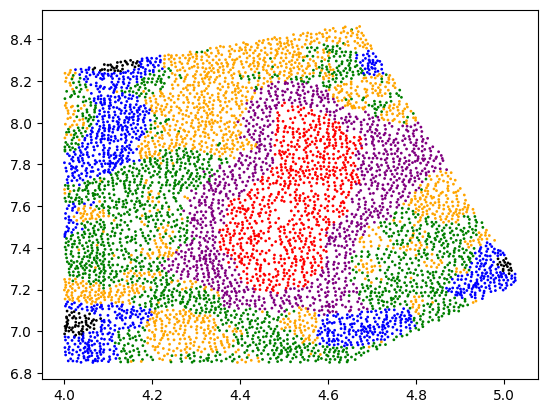

In [6]:
plt.scatter(data_slice1.obsm['spatial'][:,0],data_slice1.obsm['spatial'][:,1],c=data_slice1.obsm['color'],s=1)

In [7]:
data_slice2=adata[adata.obsm['spatial'][:,0]>2]
data_slice2=data_slice2[data_slice2.obsm['spatial'][:,0]<2.7]
data_slice2=data_slice2[data_slice2.obsm['spatial'][:,1]>7.8]
data_slice2=data_slice2[data_slice2.obsm['spatial'][:,1]<9.75]
data_slice2=data_slice2[data_slice2.obsm['spatial'][:,1]- 7.95>1*(data_slice2.obsm['spatial'][:,0] - 2.5)]
data_slice2=data_slice2[data_slice2.obsm['spatial'][:,1]- 9.25<-1.25*(data_slice2.obsm['spatial'][:,0] - 2.7)]

index=[]
for i in np.unique(data_slice2.obs_names):
    index.append(np.where(data_slice2.obs_names==i)[0][0])

data_slice2=data_slice2[index,:]

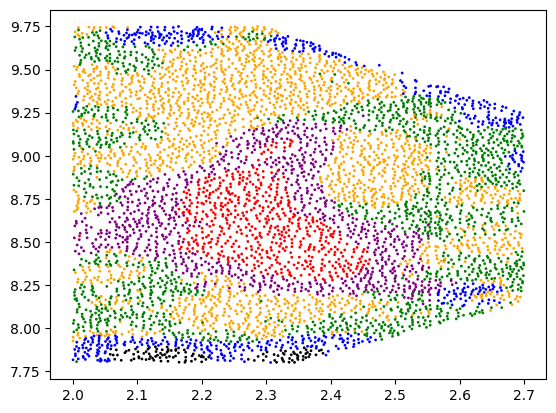

In [8]:
plt.scatter(data_slice2.obsm['spatial'][:,0],data_slice2.obsm['spatial'][:,1],c=data_slice2.obsm['color'],s=1)

In [9]:
data_slice3=adata[adata.obsm['spatial'][:,1]>9.8]
data_slice3=data_slice3[data_slice3.obsm['spatial'][:,1]- 9.75>2*(data_slice3.obsm['spatial'][:,0] - 4.5)]
data_slice3=data_slice3[data_slice3.obsm['spatial'][:,0]<4.65]
data_slice3=data_slice3[data_slice3.obsm['spatial'][:,1]- 11<-0.625*(data_slice3.obsm['spatial'][:,0] - 4.1)]
data_slice3=data_slice3[data_slice3.obsm['spatial'][:,1]- 11<1.4286*(data_slice3.obsm['spatial'][:,0] - 4.1)]
data_slice3=data_slice3[data_slice3.obsm['spatial'][:,0]>3.75]
data_slice3=data_slice3[data_slice3.obsm['spatial'][:,1]- 9.75>-3*(data_slice3.obsm['spatial'][:,0] - 3.8)]
index=[]
for i in np.unique(data_slice3.obs_names):
    index.append(np.where(data_slice3.obs_names==i)[0][0])

data_slice3=data_slice3[index,:]

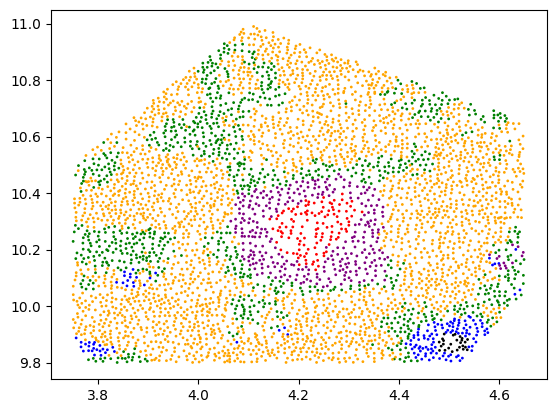

In [10]:
plt.scatter(data_slice3.obsm['spatial'][:,0],data_slice3.obsm['spatial'][:,1],c=data_slice3.obsm['color'],s=1)

In [11]:
data_slice4=adata[adata.obsm['spatial'][:,1]<7.85]
data_slice4=data_slice4[data_slice4.obsm['spatial'][:,1]- 7.85<1*(data_slice4.obsm['spatial'][:,0] - 7.25)]
data_slice4=data_slice4[data_slice4.obsm['spatial'][:,0]>7]
data_slice4=data_slice4[data_slice4.obsm['spatial'][:,1]- 7.3>-0.5*(data_slice4.obsm['spatial'][:,0] - 7)]
data_slice4=data_slice4[data_slice4.obsm['spatial'][:,1]- 7>0.2*(data_slice4.obsm['spatial'][:,0] - 7.3)]
data_slice4=data_slice4[data_slice4.obsm['spatial'][:,0]<7.85]
data_slice4=data_slice4[data_slice4.obsm['spatial'][:,1]- 7.6<-0.5*(data_slice4.obsm['spatial'][:,0] - 7.9)]
index=[]
for i in np.unique(data_slice4.obs_names):
    index.append(np.where(data_slice4.obs_names==i)[0][0])

data_slice4=data_slice4[index,:]

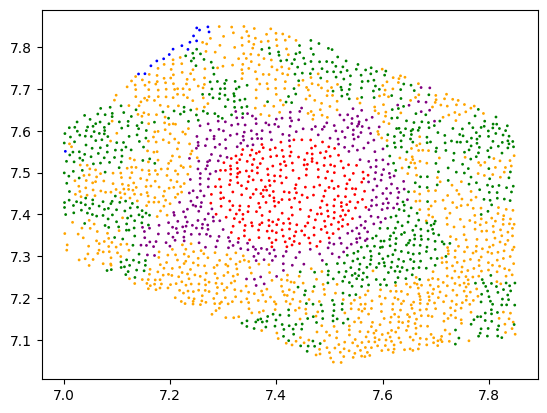

In [12]:
plt.scatter(data_slice4.obsm['spatial'][:,0],data_slice4.obsm['spatial'][:,1],c=data_slice4.obsm['color'],s=1)

In [13]:
data_slice5=adata[adata.obsm['spatial'][:,0]<10.5]
data_slice5=adata[adata.obsm['spatial'][:,1]>8.6]
data_slice5=data_slice5[data_slice5.obsm['spatial'][:,1]- 8.1>2.6*(data_slice5.obsm['spatial'][:,0] - 10)]
data_slice5=data_slice5[data_slice5.obsm['spatial'][:,1]- 9.4<-1*(data_slice5.obsm['spatial'][:,0] - 10.1)]
data_slice5=data_slice5[data_slice5.obsm['spatial'][:,1]- 9.25<0.2*(data_slice5.obsm['spatial'][:,0] - 9.25)]
data_slice5=data_slice5[data_slice5.obsm['spatial'][:,1]- 8.25<5*(data_slice5.obsm['spatial'][:,0] - 9.15)]
data_slice5=data_slice5[data_slice5.obsm['spatial'][:,1]- 8.85>-0.5*(data_slice5.obsm['spatial'][:,0] - 9.6)]

index=[]
for i in np.unique(data_slice5.obs_names):
    index.append(np.where(data_slice5.obs_names==i)[0][0])

data_slice5=data_slice5[index,:]

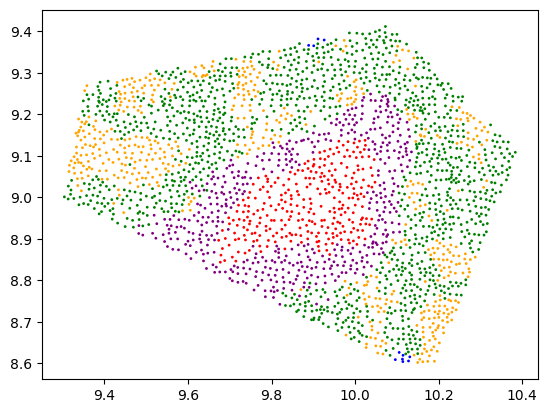

In [14]:
plt.scatter(data_slice5.obsm['spatial'][:,0],data_slice5.obsm['spatial'][:,1],c=data_slice5.obsm['color'],s=1)

In [15]:
data_slice6=adata[adata.obsm['spatial'][:,0]<10]
data_slice6=data_slice6[data_slice6.obsm['spatial'][:,1]-7<5.3 *(data_slice6.obsm['spatial'][:,0] - 9.05)]
data_slice6=data_slice6[data_slice6.obsm['spatial'][:,1]- 7>-0.25*(data_slice6.obsm['spatial'][:,0] - 9.05)]
data_slice6=data_slice6[data_slice6.obsm['spatial'][:,1]- 7.35>0.864*(data_slice6.obsm['spatial'][:,0] - 10)]
data_slice6=data_slice6[data_slice6.obsm['spatial'][:,1]-8.375<0.353*(data_slice6.obsm['spatial'][:,0] - 10)]
index=[]
for i in np.unique(data_slice6.obs_names):
    index.append(np.where(data_slice6.obs_names==i)[0][0])

data_slice6=data_slice6[index,:]

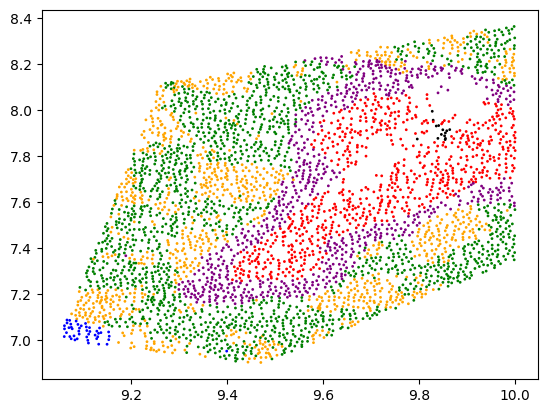

In [16]:
plt.scatter(data_slice6.obsm['spatial'][:,0],data_slice6.obsm['spatial'][:,1],c=data_slice6.obsm['color'],s=1)

In [17]:
data_slice7=adata[adata.obsm['spatial'][:,1]>8.3]
data_slice7=data_slice7[data_slice7.obsm['spatial'][:,0]>7.5]
data_slice7=data_slice7[data_slice7.obsm['spatial'][:,0]<8.35]
data_slice7=data_slice7[data_slice7.obsm['spatial'][:,1]-8.15>-1.75 *(data_slice7.obsm['spatial'][:,0] - 7.9)]
data_slice7=data_slice7[data_slice7.obsm['spatial'][:,1]- 9.2<0.8*(data_slice7.obsm['spatial'][:,0] - 7.75)]
data_slice7=data_slice7[data_slice7.obsm['spatial'][:,1]- 8.3>1.6666*(data_slice7.obsm['spatial'][:,0] - 8.15)]
data_slice7=data_slice7[data_slice7.obsm['spatial'][:,1]-9.1<-0.9*(data_slice7.obsm['spatial'][:,0] - 8)]

index=[]
for i in np.unique(data_slice7.obs_names):
    index.append(np.where(data_slice7.obs_names==i)[0][0])

data_slice7=data_slice7[index,:]

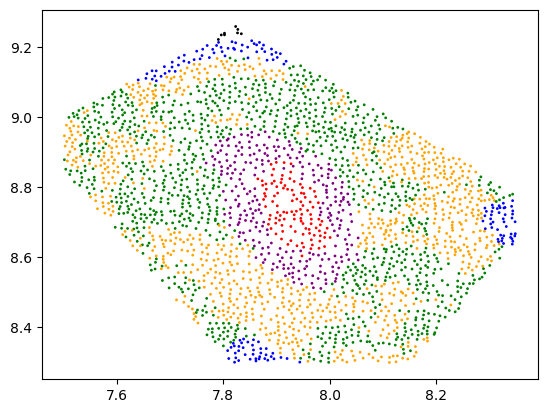

In [18]:
plt.scatter(data_slice7.obsm['spatial'][:,0],data_slice7.obsm['spatial'][:,1],c=data_slice7.obsm['color'],s=1)

In [19]:
data_slice8=adata[adata.obsm['spatial'][:,1]>7.75]
data_slice8=data_slice8[data_slice8.obsm['spatial'][:,1]- 8.3<1.6666*(data_slice8.obsm['spatial'][:,0] - 8.15)]
data_slice8=data_slice8[data_slice8.obsm['spatial'][:,0]<9]
data_slice8=data_slice8[data_slice8.obsm['spatial'][:,1]- 8.25<-1*(data_slice8.obsm['spatial'][:,0] - 9)]
data_slice8=data_slice8[data_slice8.obsm['spatial'][:,1]<8.6]
data_slice8=data_slice8[data_slice8.obsm['spatial'][:,1]- 7.75>-1*(data_slice8.obsm['spatial'][:,0] - 8.5)]

index=[]
for i in np.unique(data_slice8.obs_names):
    index.append(np.where(data_slice8.obs_names==i)[0][0])

data_slice8=data_slice8[index,:]

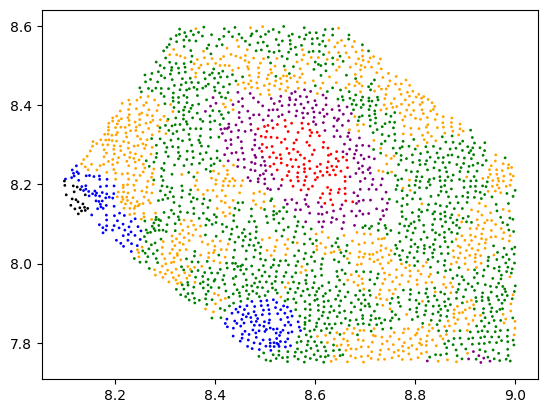

In [20]:
plt.scatter(data_slice8.obsm['spatial'][:,0],data_slice8.obsm['spatial'][:,1],c=data_slice8.obsm['color'],s=1)

In [21]:
data_slice9=adata[adata.obsm['spatial'][:,1]>8.1]
data_slice9=data_slice9[data_slice9.obsm['spatial'][:,1]- 8.25>1*(data_slice9.obsm['spatial'][:,0] - 9.8)]
data_slice9=data_slice9[data_slice9.obsm['spatial'][:,0]<9.85]
data_slice9=data_slice9[data_slice9.obsm['spatial'][:,1]- 8.85<-0.5*(data_slice9.obsm['spatial'][:,0] - 9.6)]
data_slice9=data_slice9[data_slice9.obsm['spatial'][:,1]- 8.75<-0.5*(data_slice9.obsm['spatial'][:,0] - 9.5)]
data_slice9=data_slice9[data_slice9.obsm['spatial'][:,0]>9.3]
index=[]
for i in np.unique(data_slice9.obs_names):
    index.append(np.where(data_slice9.obs_names==i)[0][0])

data_slice9=data_slice9[index,:]

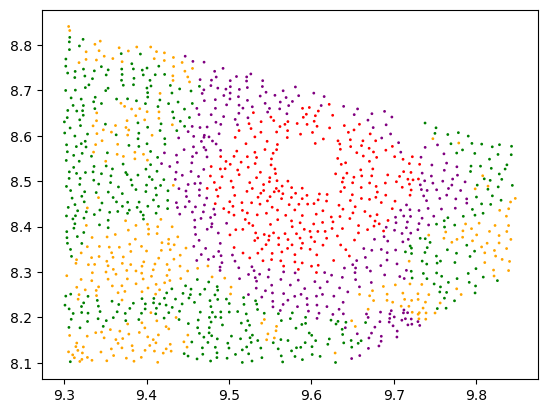

In [22]:
plt.scatter(data_slice9.obsm['spatial'][:,0],data_slice9.obsm['spatial'][:,1],c=data_slice9.obsm['color'],s=1)

In [23]:
data_slice10=adata[adata.obsm['spatial'][:,1]- 9>0.5*(adata.obsm['spatial'][:,0] - 10.4)]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,1]- 9.4>-1*(data_slice10.obsm['spatial'][:,0] - 10.1)]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,1]- 9.4>-1*(data_slice10.obsm['spatial'][:,0] - 10.1)]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,1]- 9.73>1.7286*(data_slice10.obsm['spatial'][:,0] - 11)]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,1]- 9.6<0.6667*(data_slice10.obsm['spatial'][:,0] - 9.9)]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,1]<9.95]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,0]>10]
data_slice10=data_slice10[data_slice10.obsm['spatial'][:,1]- 9.62<-2.2*(data_slice10.obsm['spatial'][:,0] - 10.9)]

index=[]
for i in np.unique(data_slice10.obs_names):
    index.append(np.where(data_slice10.obs_names==i)[0][0])

data_slice10=data_slice10[index,:]

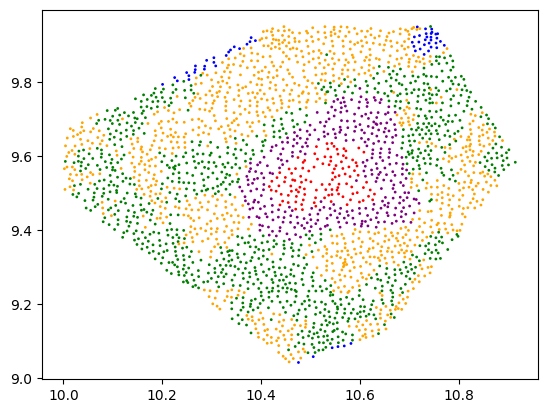

In [24]:
plt.scatter(data_slice10.obsm['spatial'][:,0],data_slice10.obsm['spatial'][:,1],c=data_slice10.obsm['color'],s=1)

In [25]:
data=ad.AnnData(np.concatenate((data_slice1.X,data_slice2.X,data_slice3.X,data_slice4.X,data_slice5.X,data_slice6.X,data_slice7.X,data_slice8.X,data_slice9.X,data_slice10.X)))
data.obsm['spatial']=np.concatenate((data_slice1.obsm['spatial'],data_slice2.obsm['spatial'],data_slice3.obsm['spatial'],data_slice4.obsm['spatial'],data_slice5.obsm['spatial'],data_slice6.obsm['spatial'],data_slice7.obsm['spatial'],data_slice8.obsm['spatial'],data_slice9.obsm['spatial'],data_slice10.obsm['spatial']))
data.obsm['sample']=np.concatenate((np.repeat('data_slice1',data_slice1.shape[0]),np.repeat('data_slice2',data_slice2.shape[0]),np.repeat('data_slice3',data_slice3.shape[0]),np.repeat('data_slice4',data_slice4.shape[0]),np.repeat('data_slice5',data_slice5.shape[0]),np.repeat('data_slice6',data_slice6.shape[0]),np.repeat('data_slice7',data_slice7.shape[0]),np.repeat('data_slice8',data_slice8.shape[0]),np.repeat('data_slice9',data_slice9.shape[0]),np.repeat('data_slice10',data_slice10.shape[0])))

sc.pp.normalize_total(data, inplace=True)
sc.tl.pca(data, svd_solver='arpack')
for i in range(1,11):
    globals()[f'data_slice{i}'].obsm['pca'] = data.obsm['X_pca'][data.obsm['sample']==f'data_slice{i}',:]
    globals()[f'data_slice{i}'].varm['PCs'] = data.varm['PCs']

C:\Users\10848\AppData\Local\Temp\ipykernel_41652\4250937619.py:8: ImplicitModificationWarning: Setting element `.obsm['pca']` of view, initializing view as actual.
  globals()[f'data_slice{i}'].obsm['pca'] = data.obsm['X_pca'][data.obsm['sample']==f'data_slice{i}',:]
C:\Users\10848\AppData\Local\Temp\ipykernel_41652\4250937619.py:8: ImplicitModificationWarning: Setting element `.obsm['pca']` of view, initializing view as actual.
  globals()[f'data_slice{i}'].obsm['pca'] = data.obsm['X_pca'][data.obsm['sample']==f'data_slice{i}',:]
C:\Users\10848\AppData\Local\Temp\ipykernel_41652\4250937619.py:8: ImplicitModificationWarning: Setting element `.obsm['pca']` of view, initializing view as actual.
  globals()[f'data_slice{i}'].obsm['pca'] = data.obsm['X_pca'][data.obsm['sample']==f'data_slice{i}',:]
C:\Users\10848\AppData\Local\Temp\ipykernel_41652\4250937619.py:8: ImplicitModificationWarning: Setting element `.obsm['pca']` of view, initializing view as actual.
  globals()[f'data_slice{i}'

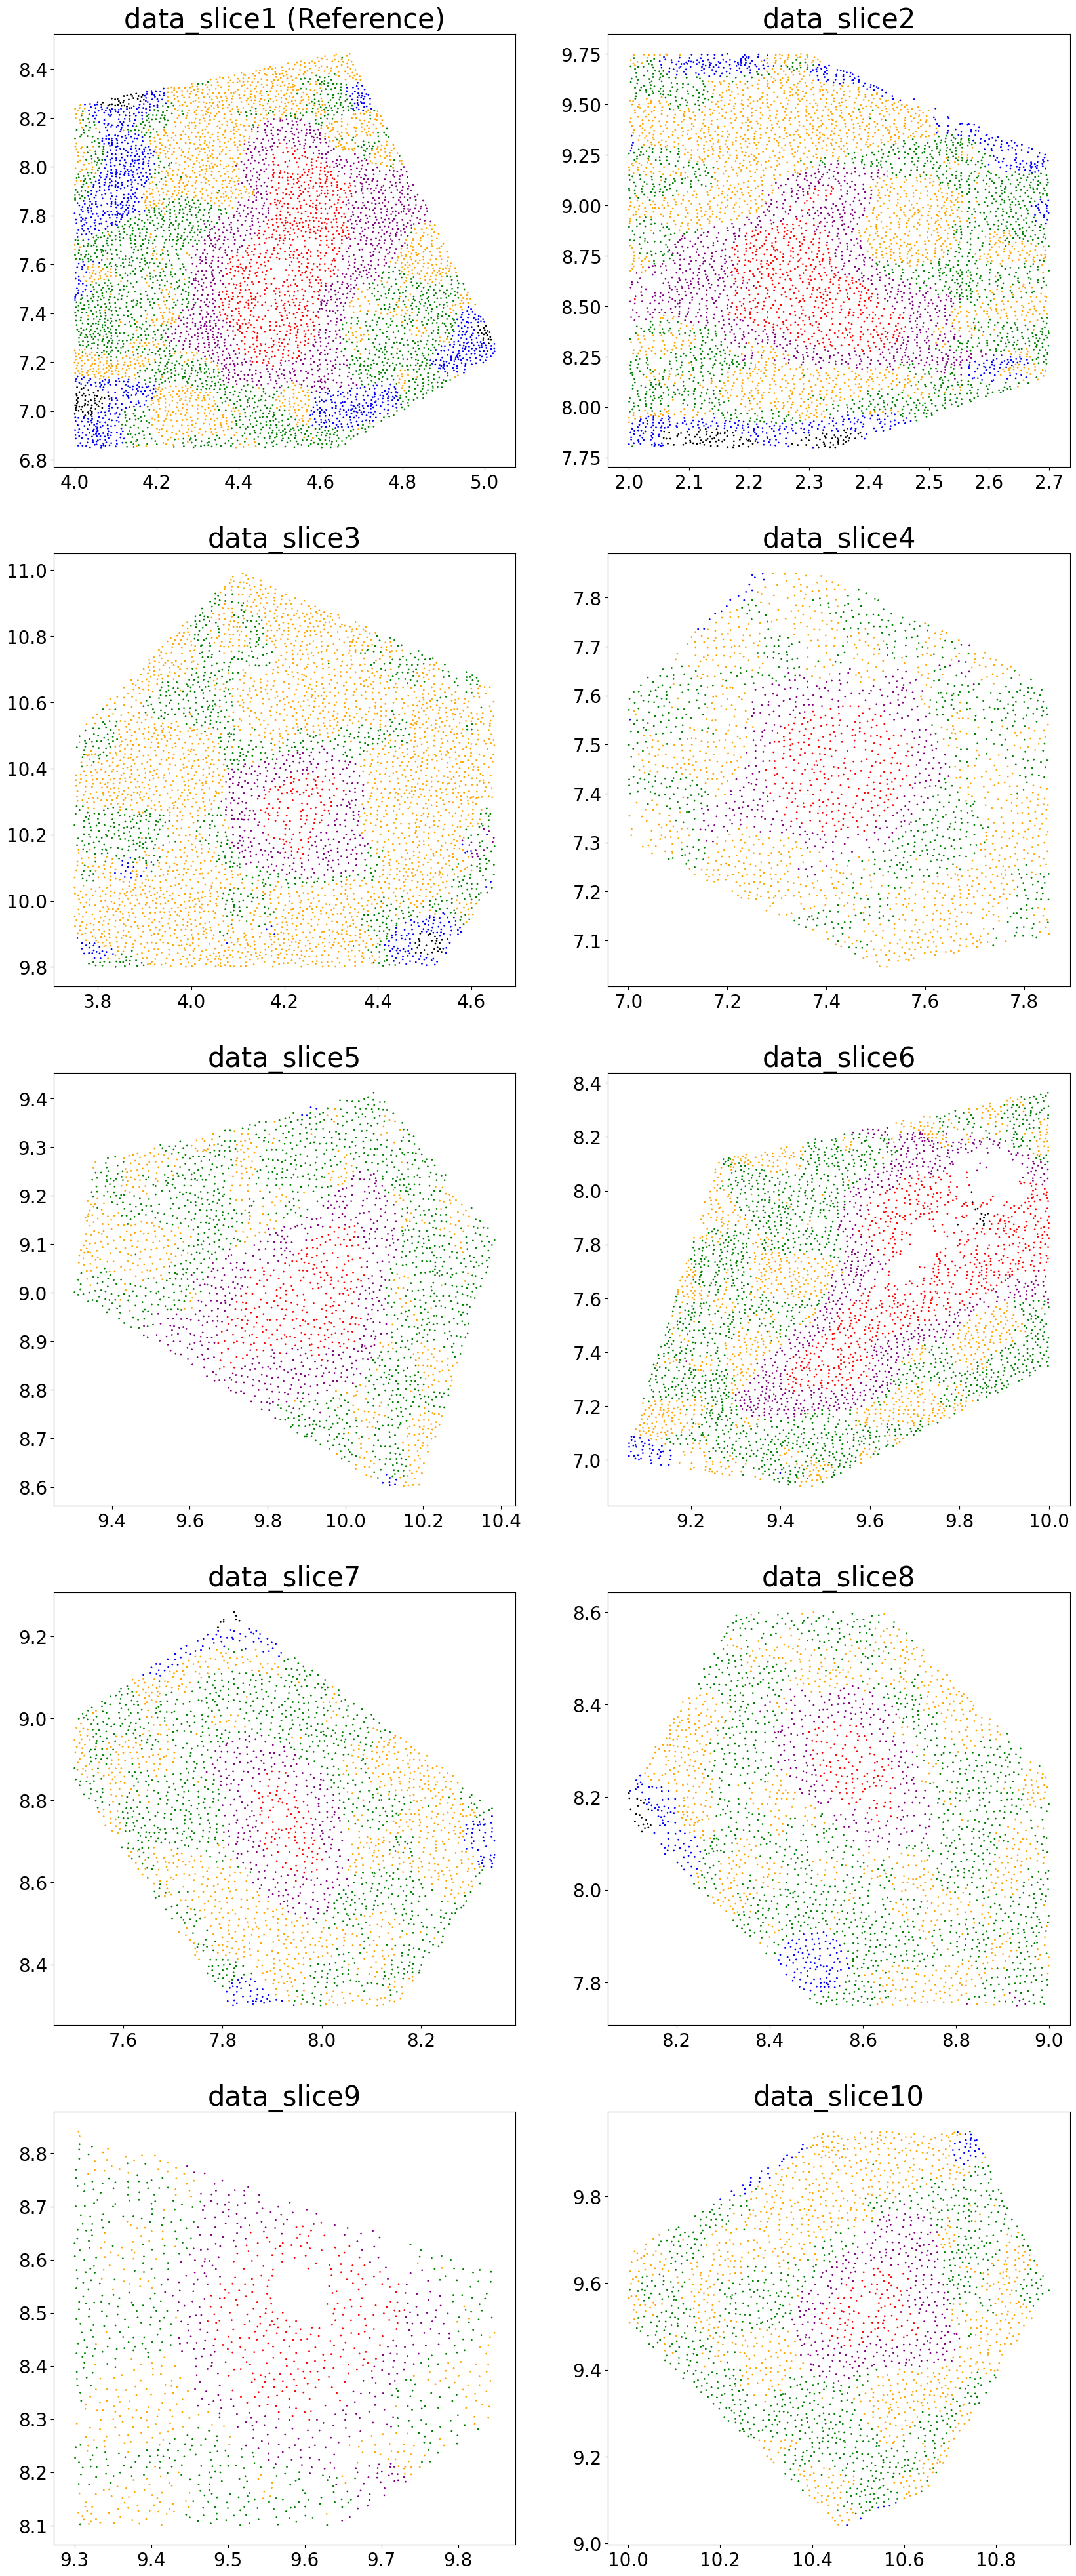

In [26]:
cl={}
sp={}
for i in range(1, 11):
    cl[f"data_slice{i}"]=globals()[f"data_slice{i}"].obsm['color']
    sp[f"data_slice{i}"]=globals()[f"data_slice{i}"].obsm['spatial']
num_plot = len(cl)
plot_row = int(np.floor(num_plot/2) + 1)

plt.figure(figsize=((20,10 * plot_row)))
for j in range(num_plot):
    plt.subplot(plot_row,2,j+1)
    sp0 = sp[f'data_slice{j+1}']
    cl0 = cl[f'data_slice{j+1}']

    plt.scatter(sp0[:,0],sp0[:,1],s=1,c=cl0)
    if(j==0):
        plt.title('data_slice1 (Reference)',fontsize=30)
    else:
        plt.title(f'data_slice{j+1}',fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

In [27]:
for i in range(1,11):
    globals()[f"data_slice{i}"].write_h5ad(f'{path}/data_slice{i}.h5ad')